# Coding Assignment 4

```
Logistic Regression Program - Pima Indians dataset
Author: Sreejith S
```

Ref: https://www.kaggle.com/uciml/pima-indians-diabetes-database

Ref: https://www.medicinenet.com/glucose_tolerance_test/article.htm

Ref: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [349]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## 4.0. Load dataset

In [350]:
# Importing the dataset
dataset = pd.read_csv('/content/pima-indians-diabetes.csv') 
print(dataset.shape)

(768, 9)


## 4.1. Understanding the data



### 4.1.1. Inspecting Dataset

In [351]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 80)
print(dataset.head())
print("="*80)
print("="*80)
print(dataset.describe())
print("="*80)
print("="*80)
print(dataset.info())

#dataset.plot(kind='scatter', subplots=True, layout=(3, 3), sharey=False)
#plt.show()

   pregnant  plasma_glucose  dia_BP  skin_thickness  serum_insulin   bmi  \
0         6             148      72              35              0  33.6   
1         1              85      66              29              0  26.6   
2         8             183      64               0              0  23.3   
3         1              89      66              23             94  28.1   
4         0             137      40              35            168  43.1   

   diab_pedigree  age  Diab  
0          0.627   50     1  
1          0.351   31     0  
2          0.672   32     1  
3          0.167   21     0  
4          2.288   33     1  
         pregnant  plasma_glucose      dia_BP  skin_thickness  serum_insulin  \
count  768.000000      768.000000  768.000000      768.000000     768.000000   
mean     3.845052      120.894531   69.105469       20.536458      79.799479   
std      3.369578       31.972618   19.355807       15.952218     115.244002   
min      0.000000        0.000000    0.0000

In [352]:
#Creating info_dict for easier ploting
info_dict = {
    0:   ["pregnant", "# Pregnancies"],
    1:   ["plasma_glucose", "Plasma glucose concentration 2 hrs OGTT (mg/dl)"],
    2:   ["dia_BP", "Diastolic Blood Pressure (mm Hg)"],          
    3:   ["skin_thickness", "Triceps skin fold thickness (mm)"], 
    4:   ["serum_insulin", "2-Hour serum insulin (mu U/ml)"],   
    5:   ["bmi", "BMI (kg/m^2)"],            
    6:   ["diab_pedigree", "Diabetes pedigree function"],  
    7:   ["age", "Age (years)"]             
}

### 4.1.2. Selecting class labels, and featureset




In [353]:
X = dataset.drop(columns=['Diab'])
print(X.head(), '\n')
y = dataset['Diab']
print(y.head())

   pregnant  plasma_glucose  dia_BP  skin_thickness  serum_insulin   bmi  \
0         6             148      72              35              0  33.6   
1         1              85      66              29              0  26.6   
2         8             183      64               0              0  23.3   
3         1              89      66              23             94  28.1   
4         0             137      40              35            168  43.1   

   diab_pedigree  age  
0          0.627   50  
1          0.351   31  
2          0.672   32  
3          0.167   21  
4          2.288   33   

0    1
1    0
2    1
3    0
4    1
Name: Diab, dtype: int64


### 4.1.3. Plotting the dataset



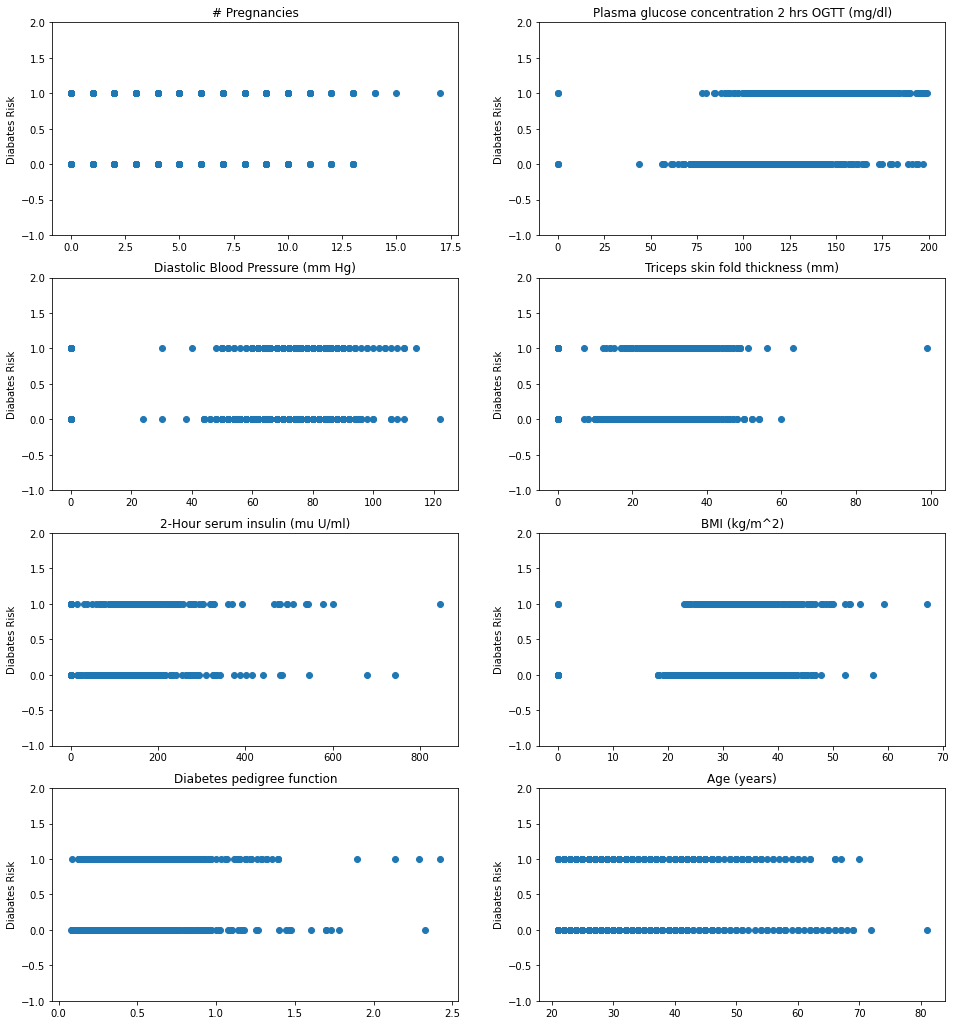

In [354]:
fig =  plt.figure(figsize=(16,18))
for i in range(8):
  ax = fig.add_subplot(4, 2, i+1)
  ax.scatter(X.iloc[:, i], y)
  ax.set_title(info_dict[i][1])
  ax.set_ylabel("Diabates Risk")
  ax.set_ylim(-1,2)

plt.show()


### 4.1.4. Observations

#### Invalid data points
It can be observed that several features have zero values when it is impossible to have zero values for them. `plasma_glucose`, `dia_BP`, `BMI` etc are a few such features. Either these outliers can be removed from the dataset or can be replaced with mean values.

#### <em>Which input variable, do you think, is better in predicting if someone is going to get diabetes in the next 5 year?</em>
It is hard from the plots in `4.1.3` alone to predict which input variable is better in predicting if someone is going to get diabetes in the next 5 years. On visual inspection, `BMI`, `plasma_glucose` seems to have some effect on the outcome.

Comparing means of each feature between diabetic and non-diabetic might give some insights. But the means can be affected by the outliers. From the code cell below, it can be observed that diabetic patients have a higher `BMI=35` as compared to `BMI=30` for non-diabetics.

Another option might be to see the correlation between features and Diab. Padas provide a method `corr()` for dataframes. This was tested in the cell below and `BMI`, `plasma_glucose`, `diab_pedigree`, `serum_insulin` & even `age` to some extent was found to have an influence on diabetes. 



In [355]:
for feature in X:
  m1 = np.mean(dataset[dataset.Diab == 1][feature])
  m0 = np.mean(dataset[dataset.Diab == 0][feature])
  print(f"Avg value of {feature:<16} when, y = 1, is {m1}")
  print(f"Avg value of {feature:<16} when, y = 0, is {m0}")
  print("\n")

dataset.corr(method='pearson')

Avg value of pregnant         when, y = 1, is 4.865671641791045
Avg value of pregnant         when, y = 0, is 3.298


Avg value of plasma_glucose   when, y = 1, is 141.25746268656715
Avg value of plasma_glucose   when, y = 0, is 109.98


Avg value of dia_BP           when, y = 1, is 70.82462686567165
Avg value of dia_BP           when, y = 0, is 68.184


Avg value of skin_thickness   when, y = 1, is 22.16417910447761
Avg value of skin_thickness   when, y = 0, is 19.664


Avg value of serum_insulin    when, y = 1, is 100.33582089552239
Avg value of serum_insulin    when, y = 0, is 68.792


Avg value of bmi              when, y = 1, is 35.14253731343278
Avg value of bmi              when, y = 0, is 30.30419999999996


Avg value of diab_pedigree    when, y = 1, is 0.5505
Avg value of diab_pedigree    when, y = 0, is 0.42973400000000017


Avg value of age              when, y = 1, is 37.06716417910448
Avg value of age              when, y = 0, is 31.19




,pregnant,plasma_glucose,dia_BP,skin_thickness,serum_insulin,bmi,diab_pedigree,age,Diab
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
dia_BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Diab,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4.1.5. Clean-up dataset

Fixing zero values - On exploring the kaggle discussions on the dataset, it was found that the zero values are due to incomplete hospital records. We can compare effects on replacing these zero values.



In [356]:
replace_zeros_with_mean = False
if replace_zeros_with_mean:
  #testing    
  print(dataset[dataset.bmi == 0])
  print("-"*80)

  cols = ["bmi", "dia_BP", "skin_thickness", "plasma_glucose"]
  means = []
  for c in cols:
    mean = np.mean(dataset[dataset[c] != 0][c])
    means.append(mean)
  
  for c, m in zip(cols, means):
    dataset[c] = dataset[c].replace(0, m)

  #testing    
  print(dataset[dataset.bmi == 0])

## 4.2. Write code to find out how many people in the dataset are marked as having 5-year diabetes?

From the code cell below, 268 patients are marked as having diabetes.

In [357]:
dataset[(dataset.Diab == 1)]
#print(dataset[dataset.Diab == 1].shape[0])

,pregnant,plasma_glucose,dia_BP,skin_thickness,serum_insulin,bmi,diab_pedigree,age,Diab
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


## 4.3. Creating Logistic Reg. model and visualizing



### 4.3.1. Creating feature sets

There separate feature sets are created as per `Q4.3`
```
X <- All features
X_4_3_a <- 'age', 'pregnant', 'bmi'
X_4_3_b <- 'skin_thickness', 'diab_pedigree', 'dia_BP'
```

In [358]:
X = dataset.drop(columns=['Diab'])
X_4_3_a = dataset[['age', 'pregnant', 'bmi']]
X_4_3_b = dataset[['skin_thickness', 'diab_pedigree', 'dia_BP']]
print(X.head(), '\n')
print("-"*80)
print(X_4_3_a.head(), '\n')
print("-"*80)
print(X_4_3_b.head(), '\n')
print("-"*80)
y = dataset['Diab']
print(y.head())

   pregnant  plasma_glucose  dia_BP  skin_thickness  serum_insulin   bmi  \
0         6             148      72              35              0  33.6   
1         1              85      66              29              0  26.6   
2         8             183      64               0              0  23.3   
3         1              89      66              23             94  28.1   
4         0             137      40              35            168  43.1   

   diab_pedigree  age  
0          0.627   50  
1          0.351   31  
2          0.672   32  
3          0.167   21  
4          2.288   33   

--------------------------------------------------------------------------------
   age  pregnant   bmi
0   50         6  33.6
1   31         1  26.6
2   32         8  23.3
3   21         1  28.1
4   33         0  43.1 

--------------------------------------------------------------------------------
   skin_thickness  diab_pedigree  dia_BP
0              35          0.627      72
1            

### 4.3.2. Logistic Regression
#### Using all 8 input features

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def create_model(X, y, test_size=0.3, random_state=0, quiet=False):
  """

  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  logreg = LogisticRegression(max_iter=200)
  logreg.fit(X_train, y_train)

  y_pred = logreg.predict(X_test)
  test_acc = logreg.score(X_test, y_test)
  train_acc = logreg.score(X_train, y_train)
  if not quiet:
    print("Accuracy of Logistic Regression Classifier: ")
    print(f'on test set: {test_acc:.2f}')
    print(f'on train set: {train_acc:.2f}')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
  influence = np.std(X, 0)*logreg.coef_[0]
  return test_acc, train_acc, influence

_, _, influence1 = create_model(X, y)

Accuracy of Logistic Regression Classifier: 
on test set: 0.78
on train set: 0.77
Confusion Matrix:
 [[141  16]
 [ 35  39]]


#### a. Only age, pregnant, and bmi as the input features

In [360]:
create_model(X_4_3_a, y)

Accuracy of Logistic Regression Classifier: 
on test set: 0.68
on train set: 0.69
Confusion Matrix:
 [[135  22]
 [ 51  23]]


(0.683982683982684, 0.6871508379888268, age         0.488079
 pregnant    0.218059
 bmi         0.869156
 dtype: float64)

#### b. Only skin_thickness, diab_pedigree, and dia_BP as the input features

In [361]:
create_model(X_4_3_b, y)

Accuracy of Logistic Regression Classifier: 
on test set: 0.68
on train set: 0.64
Confusion Matrix:
 [[151   6]
 [ 68   6]]


(0.6796536796536796, 0.6443202979515829, skin_thickness    0.134746
 diab_pedigree     0.276704
 dia_BP            0.136894
 dtype: float64)

#### Trying out alternate input feature sets

'plasma_glucose', 'serum_insulin', 'bmi', 'diab_pedigree'

In [362]:
#picked from top correlations
X_4_3_x = dataset[['plasma_glucose', 'serum_insulin', 'bmi', 'diab_pedigree']]
_, _, influence2 = create_model(X_4_3_x, y)

Accuracy of Logistic Regression Classifier: 
on test set: 0.80
on train set: 0.76
Confusion Matrix:
 [[143  14]
 [ 33  41]]


## 4.4. Out of the three models (all features, and then (a), (b) features), which model performs the best in classification? Specify the reason too.

#### Without replacing outlier zeros

| Features Selected  | Test Accuracy  | Train Accuracy   | Confusion Matrix (tn, fp, fn, tp) |
|---|---|---|---|
| all features  | 0.78   | 0.77  | 141, 16, 35, 39  |
| 4.3.a) age, pregnant, and bmi  | 0.68 | 0.69  | 135, 22, 51, 23  |
| 4.3.b) skin_thickness, diab_pedigree, dia_BP  | 0.68  | 0.64  | 151, 6, 68, 6 |
| plasma_glucose, serum_insulin, bmi, diab_pedigree  | 0.80  | 0.76  | 143, 14, 33, 41  |


#### After replacing outlier zeros with mean

| Features Selected  | Test Accuracy  | Train Accuracy   | Confusion Matrix (tn, fp, fn, tp) |
|---|---|---|---|
| all features  | 0.77   | 0.77  | 141, 16, 36, 38  |
| 4.3.a) age, pregnant, and bmi  | 0.69 | 0.69  | 136, 21, 50, 24  |
| 4.3.b) skin_thickness, diab_pedigree, dia_BP  | 0.72  | 0.65  | 150, 7, 57, 17 |
| plasma_glucose, serum_insulin, bmi, diab_pedigree  | 0.79  | 0.77  | 140, 17, 31, 43  |



The model with all 8 features performs best in the original three cases. This was because the other two `4.3.a` & `4.3.b` might not have been able to capture the true model as soem significant feature, like `plasma_glucose`, might have been omitted.


On exploring to find if a better feature set existed it was found that `(plasma_glucose, serum_insulin, bmi, diab_pedigree)` performed better than the `8-input feature set`. 
For such a small dataset, it might be hard to know if this will always hold true. But finding conforms with existing literature on diabetes risks.


Replacing zeros with mean didn't improve the best performing sets.
Perhaps, this might be due to the fact that the outliers are preventing the model from overfitting to any particular feature too much.

Interestingly, `4.3.b) skin_thickness, diab_pedigree, dia_BP` had the best true-negative among all, but it performed poorly on every other confusion matrix values (fn, fp & tp).

It was also observed that, using a `test_size=0.2` also improves the test accuracy.

Since we were able to achieve a better performance with fewer input features `(plasma_glucose, serum_insulin, bmi, diab_pedigree)`, the remaining input features can be considered insignificant for this particular dataset. It was  also note that the aforementioned four features had a higher correlation with `Diab`, when compared to features like `skin_thickness`.

In the cell below, the influence of each feature can be observed from the `logreg.coef_` which are the magnitude of the coefficients, multiplied by `S.D` of each feature set [Ref](https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model).
Even though, `dia_BP` has a higher magnitude than `serum_insulin` when all features were used, it doesn't improve performance - [code in last cell]

In [363]:
print("8 input feature set")
print(influence1.sort_values(axis=0))
print('-'*40)
print("4 input feature set")
print(influence2.sort_values(axis=0))

8 input feature set
dia_BP           -0.226341
serum_insulin    -0.145447
skin_thickness    0.099055
diab_pedigree     0.226526
pregnant          0.290324
age               0.292800
bmi               0.708817
plasma_glucose    1.089174
dtype: float64
----------------------------------------
4 input feature set
serum_insulin    -0.195370
diab_pedigree     0.230057
bmi               0.623056
plasma_glucose    1.181423
dtype: float64


In [366]:
#Trying to find if a better accuracy feature set exist iteratively since we have a small dataset
from  itertools import combinations
features = ["pregnant", "plasma_glucose", 'dia_BP', 	'skin_thickness', 	'serum_insulin', 	'bmi', 	'diab_pedigree', 	'age']
combs = list(combinations(features, 4)) #get all combinations of r=4
#sum([list(map(list, combinations(features, i))) for i in range(1, len(features) + 1)], []) 
best_test = 0
best_feature_set = []
for c in combs:
  X_4_3_x = dataset[list(c)]
  test_acc, _, _ = create_model(X_4_3_x, y, quiet=True)
  if test_acc > best_test:
    best_test = test_acc
    best_feature_set = c

print(f"best 4 input feature set - {best_feature_set}, test_acc = {best_test:.2f}")

best 4 input feature set - ('plasma_glucose', 'serum_insulin', 'bmi', 'diab_pedigree'), test_acc = 0.80
